In [2]:
MODEL = '../wordvec_model/500features_20context_20mincount'
import gensim

In [3]:
w2v_model = gensim.models.Word2Vec.load(MODEL)
words = []
for word in w2v_model.wv.vocab:
    words.append(word)
print("Number of tokens: {}".format(len(words)))
print("Dimensions of a word vector: {}".format(len(w2v_model[words[0]])))

Number of tokens: 259638
Dimensions of a word vector: 500


/home/yyliu/anaconda3/envs/NLP/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [4]:
DATA_PICKLE = "../pickle/sentence_dict.pickle"

In [5]:
import pickle
sentence_dict = {}
with open(DATA_PICKLE, 'rb') as f:
    sentence_dict = pickle.load(f)

In [6]:
import jieba

In [7]:
import numpy as np
import string
from opencc import OpenCC 
openCC = OpenCC('tw2s') 
exclude = set(string.punctuation+'，'+'。'+'、'+'「'+'」'+'？'+'！')

def sentence2vec(sentence):
    sentence = openCC.convert(sentence)
    vector = np.zeros((w2v_model[words[0]].shape))
    oov_num = 0
    token_sentence = jieba.lcut(sentence)
    token_sentence = [t for t in token_sentence if not t in exclude]
    for token in token_sentence:
        if token in w2v_model.wv.vocab:
            vector += w2v_model[token]
        else:
            oov_num += 1
    vector /= len(token_sentence)
    return vector, oov_num, token_sentence

In [8]:
sv_dict = {}
oov_dict = {}
sentence_token_dict = {}   

In [9]:
for k, s in sentence_dict.items():
    sv, oov, sentence_token = sentence2vec(s)
    print(k)
    sv_dict[k] = sv
    oov_dict[k] = oov
    sentence_token_dict[k] = sentence_token

/home/yyliu/anaconda3/envs/NLP/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.864 seconds.
Prefix dict has been built succesfully.
/home/yyliu/anaconda3/envs/NLP/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


002.
003.
004.
005.
006. 
007.
008.
009.
010.
011.
012.
013.
015.
016.
018.
019.
020.
021.
023.
024.
025.
026.
027.
029.
030.
032.
034.
035.
037.
038.
039.
041.
044.
045.
046.
048.
049.
050.
052.
054.
055.
056.
057.
058.
059.
061.
061_.
063.
064.
065.
066.
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


In [10]:
from sklearn.cluster import KMeans

In [11]:
sv_dict_array = np.asarray([i for i in sv_dict.values()])
sv_dict_array.shape

(102, 500)

In [12]:
# dump sentence vector to pickle
import pickle
sentence2vec_array = sv_dict_array
file = open('s2v_array_zhs_500dim.pickle', 'wb')
pickle.dump(sentence2vec_array, file)
file.close()

In [13]:
model = KMeans(n_clusters=2).fit(sv_dict_array)

In [14]:
dementia = model.labels_[:52]
control = model.labels_[52:]

In [15]:
dementia

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

In [16]:
control

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [17]:
sv_dict_array[0][:10]

array([-0.023589  ,  0.01130584,  0.01665177, -0.01296628,  0.01419117,
        0.01273682,  0.02251496,  0.03223677,  0.02523408, -0.00032552])

In [18]:
sv_dict_array[:10][:10]

array([[-0.023589  ,  0.01130584,  0.01665177, ..., -0.00642709,
         0.01105848,  0.00386745],
       [-0.01766956,  0.00778954,  0.00551947, ..., -0.00213809,
         0.01191911,  0.00678711],
       [-0.00408162, -0.00648926,  0.02046449, ..., -0.0075172 ,
         0.00939415,  0.00397037],
       ...,
       [-0.01875873,  0.01550173,  0.01596014, ..., -0.00823813,
         0.00684147, -0.00202806],
       [-0.02366664,  0.02961656,  0.02470132, ..., -0.00536159,
         0.00307799, -0.00102322],
       [-0.01708856,  0.02183592,  0.01496499, ..., -0.02567066,
         0.01455029, -0.0126399 ]])

In [25]:
from sklearn import metrics
dementia = np.asarray(dementia)
control = np.asarray(control)

fp_sklearn = np.where(dementia==0)
fn_sklearn = np.where(control==1)
print("FP: " + str(fp_sklearn)+ str(len(fp_sklearn[0])))
print("FN: " + str(fn_sklearn))
print("sklearn kmeans score: {}".format(model.score(sv_dict_array)))
silhouette_score = metrics.silhouette_score(sv_dict_array, model.labels_, 
                                           metric='euclidean')
print("Silhouette score: {}".format(silhouette_score))

FP: (array([ 3,  5,  6,  7,  8,  9, 10, 13, 15, 16, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 32, 33, 38, 39, 40, 41, 42, 44, 46, 50, 51]),)31
FN: (array([15]),)
sklearn kmeans score: -2.797988489766555
Silhouette score: 0.1700384850234624


In [20]:
from nltk.cluster import KMeansClusterer
import nltk

In [21]:
kclusterer = KMeansClusterer(2, distance=nltk.cluster.util.cosine_distance,
                            repeats=1000)
assigned_clusters = kclusterer.cluster(sv_dict_array, assign_clusters=True)
print(assigned_clusters)

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]


In [22]:
dement = np.asarray(assigned_clusters[:52])
contr = np.asarray(assigned_clusters[52:])
# dement = np.asarray(dement)

fp = np.where(dement==1)
fn = np.where(contr==0)
print("FP: " + str(fp))
print("FN: " + str(fn))


FP: (array([ 7,  8,  9, 10, 15, 16, 23, 24, 27, 28, 30, 33, 39, 42, 46, 51]),)
FN: (array([15, 40, 45]),)


In [23]:
vocab_keys = []
for key in w2v_model.wv.vocab.keys():
    vocab_keys.append(key)

In [24]:
len(vocab_keys)

259638

In [24]:
# TSNE to reduce dimension
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocab = vocab_keys[:1000]
X = w2v_model[vocab]
tsne = TSNE(n_components=2)
result = tsne.fit_transform(X)
df = pd.DataFrame(result, index=vocab, columns=['x', 'y'])

/home/yyliu/anaconda3/envs/NLP/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


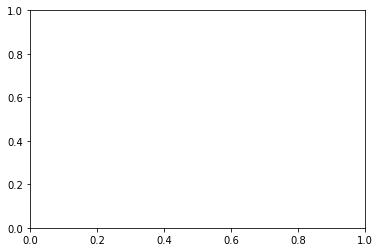

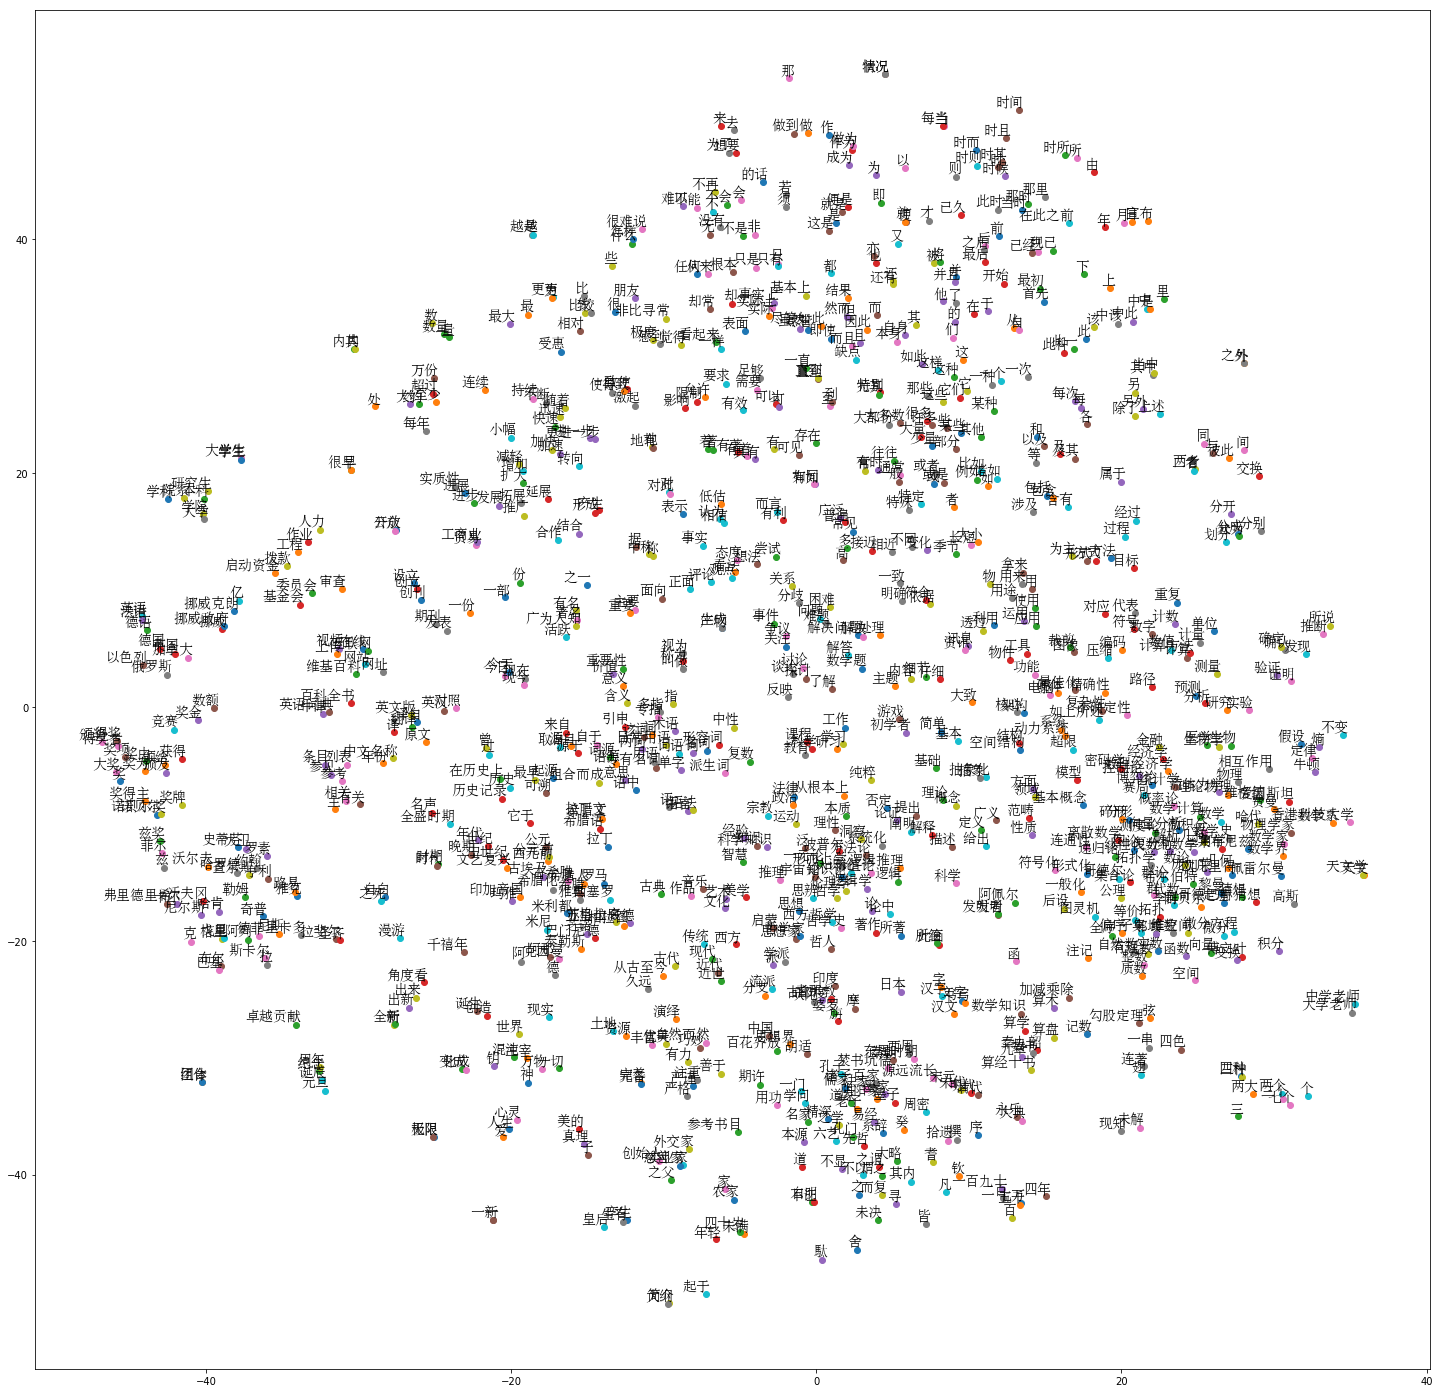

In [27]:
# plot the scatter word2vec
def plot_with_labels(low_dim_embs, labels, filename='tsne.png',fonts=None):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(25, 25))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                    fontproperties=fonts,
                    xy=(x, y),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.savefig(filename,dpi=600)
from matplotlib.font_manager import FontProperties

#为了在图片上能显示出中文
font = FontProperties(fname="../data/simsun.ttf", size=14)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

labels = vocab
plot_with_labels(result, vocab,fonts=font)